(2953, 128)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 110 samples in 0.000s...
[t-SNE] Computed neighbors for 110 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 110 / 110
[t-SNE] Mean sigma: 0.628037
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.533600
[t-SNE] Error after 1000 iterations: 0.116270
(110, 2)
            x          y  labels             classes
0   -9.600497 -15.043929     340   William Donaldson
1  -10.465498 -14.724521     340   William Donaldson
2  -10.111993 -15.149508     340   William Donaldson
3   -9.898113 -15.315242     340   William Donaldson
4   -9.988069 -14.988622     340   William Donaldson
5  -10.278106 -14.791272     340   William Donaldson
6    3.155626 -11.047168     341     William Ford Jr
7    3.552800 -10.738745     341     William Ford Jr
8    3.402478 -11.060740     341     William Ford Jr
9    2.557347 -10.143023     341     William Ford Jr
10   3.154995 -10.861238     341     Wil

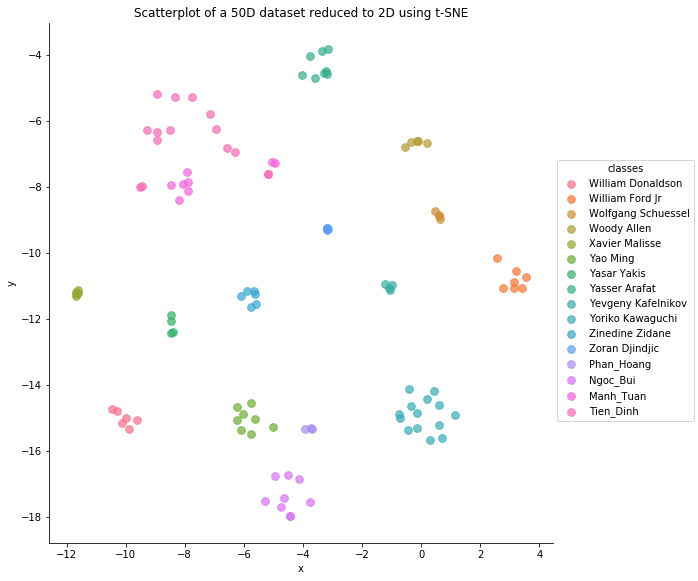

In [1]:
import sys
sys.path.insert(0, "/home/phanhoang/tf/lib/python3.4/site-packages")

import matplotlib as plt
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.externals import joblib
# Ignore "No module name _tkinter" error
# matplotlib.use('agg')
%matplotlib inline

labels, class_names, emb_arrays = joblib.load("../models/backup/model_updated.pkl")
n_samples = 15
num_samples = labels.index(n_samples)
tsne_model = TSNE(
    n_components=2, verbose=1, random_state=0,
    angle=.99, init='pca'
)
print(emb_arrays.shape)

mode = "tail"
if mode == "head":
    X_tsne = tsne_model.fit_transform(emb_arrays[:num_samples])
    df = pd.DataFrame(X_tsne, columns=['x', 'y'])
    print(X_tsne.shape)
    df["labels"] = labels[:num_samples]
elif mode == "tail":
    X_tsne = tsne_model.fit_transform(emb_arrays[-num_samples:])
    df = pd.DataFrame(X_tsne, columns=['x', 'y'])
    print(X_tsne.shape)
    df["labels"] = labels[-num_samples:]
df["classes"] = [class_names[i] for i in df["labels"]]

print(df.head(20))
g = sns.lmplot(
    'x', 'y', df, hue='classes', fit_reg=False, size=8,
    scatter_kws={'alpha': 0.7, 's': 60}
)
g.axes.flat[0].set_title(
    'Scatterplot of a 50D dataset reduced to 2D using t-SNE'
)
g.savefig("images/{}_{}_samples.png".format(n_samples, mode))

In [32]:
from sklearn.externals import joblib
labels, class_names, emb_arrays = joblib.load("../models/model_updated.pkl")
print(len(labels), len(emb_arrays), len(class_names))

2921 2921 353


In [33]:
print(class_names[-1])

Phan_Hoang


In [34]:
labels[-1]

352